## Import & loading

In [1]:
# Imports
# Packages for numerics and dataframe
import pandas as pd
import numpy as np

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for date conversions
from datetime import datetime
from datetime import date
from datetime import timedelta 

#Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics   # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
lr=LinearRegression 

In [2]:
df = pd.read_csv("Docs/2017_Yellow_Taxi_Trip_Data.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## Explore, clean and transform

In [3]:
print(df.shape)
print("")
df.info()

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

### Trip_duration

In [4]:
# Creat trip_duration

    #Convert
df["drop_off_converted"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")
df["pick_up_converted"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

    #Compute trip_duration
df["trip_duration"] = (df["drop_off_converted"] - df["pick_up_converted"])/np.timedelta64(1,"m")

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667


### Missing & duplicate data

In [5]:
# Check for missing data and duplicates using

    #Check for duplicates
print(f"Shape of dataframe: {df.shape}")
print(f"Shape of dataframe with duplicates dropped: {df.drop_duplicates().shape}")
print("")

    #Check missing value
print(f"Total missing values: {df.isna().sum().sum()}")
print("")

    #Show missing value per column
print("Missing value per columns:")
df.isna().sum()

Shape of dataframe: (22699, 21)
Shape of dataframe with duplicates dropped: (22699, 21)

Total missing values: 0

Missing value per columns:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
drop_off_converted       0
pick_up_converted        0
trip_duration            0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


### Explore connections

(0.0, 140.0)

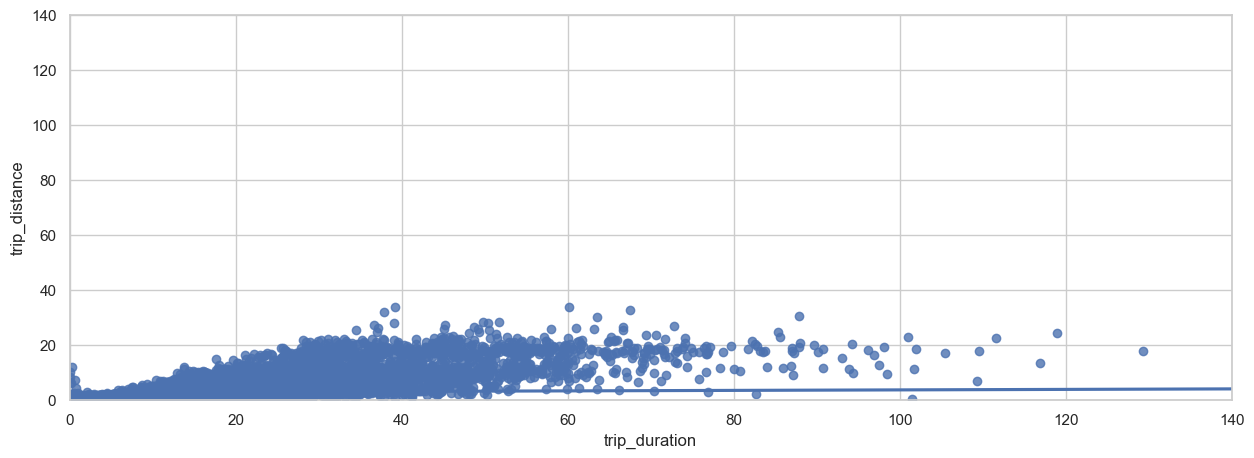

In [7]:
#Scatterplot between trip_duration and trip_distance

sns.set(style="whitegrid")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
sns.regplot(x=df["trip_duration"], y=df["trip_distance"])
plt.ylim(0, 140)
plt.xlim(0, 140)


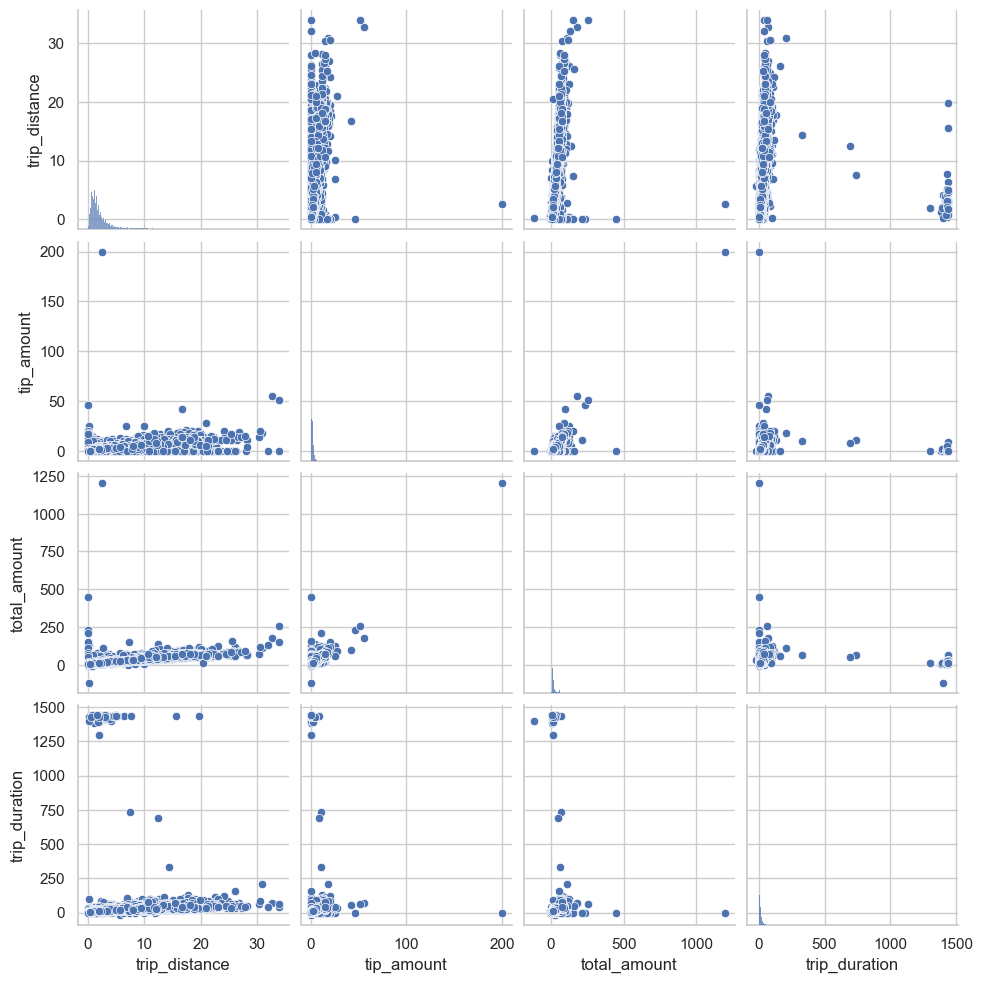

In [8]:
# Creat a pairplot to visualize pairwise between variables in the data

sns.pairplot(df[["trip_distance", "tip_amount", "total_amount", "trip_duration"]]);

### Outliers

Text(0.5, 1.0, '4 variables with outliers')

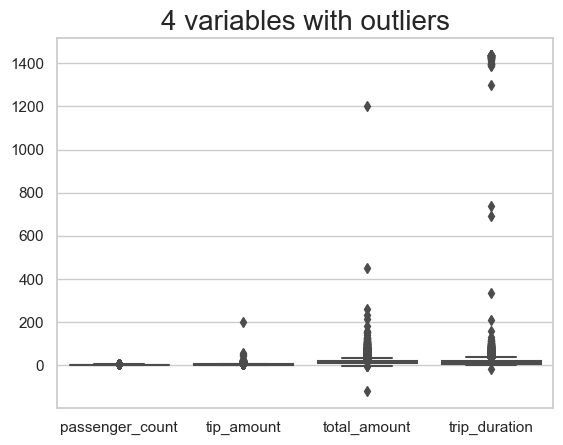

In [9]:
# creat a boxplot visualization for outliers

g = sns.boxplot(data=df[["passenger_count", "tip_amount", "total_amount", "trip_duration"]], showfliers=True)
g.set_title("4 variables with outliers", fontsize=20)

Text(0.5, 1.0, '4 Variables without Outliers')

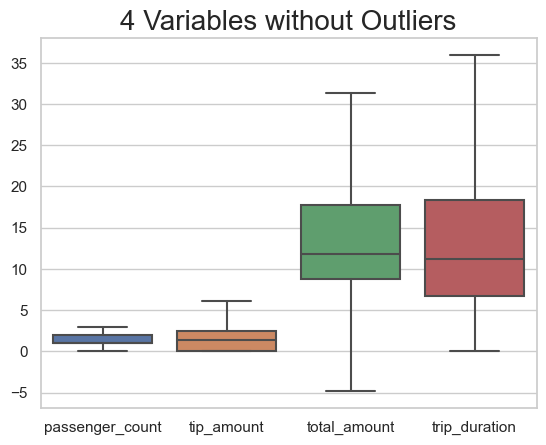

In [10]:
# Visualize of outliers distribution

g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("4 Variables without Outliers",fontsize=20)

### Deal with outliers

In [11]:
# Compute the 25th and 75th percentile values in 'trip_duration'
perc25 = df["trip_duration"].quantile(0.25)
perc75 = df["trip_duration"].quantile(0.75)

# Compute the interquartile range for 'trip_duration'
iqr = perc75 - perc25

# Compute the upper limit for 'trip_duration'
upper_limit = perc75 + 1.5 * iqr
lower_limit = perc25 - 1.5 * iqr

print(f" The limit for trip_duration are between: {lower_limit} and {upper_limit}")


 The limit for trip_duration are between: -10.949999999999998 and 35.983333333333334


In [12]:
# remove of outliers in trip_duration
df[df["trip_duration"] > 36] = 36
df[df["trip_duration"] < 0] = 0

df["trip_duration"].describe()

count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

### Identify correlations

In [13]:
df.corr(method="pearson")

C:\Users\alexa\AppData\Local\Temp\ipykernel_9752\2677068142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.370861,-0.366156,-0.356494,-0.370936,0.138825,0.146192,-0.370836,-0.172615,-0.371733,-0.371719,-0.357689,-0.370407,-0.371748,-0.135554,-0.200807
VendorID,-0.370861,1.000000,0.988050,0.946872,0.994267,-0.402605,-0.387279,0.996123,0.457043,0.996980,0.998064,0.956620,0.990252,0.998070,0.352977,0.574891
passenger_count,-0.366156,0.988050,1.000000,0.937391,0.983471,-0.397726,-0.381619,0.985597,0.453248,0.986161,0.987297,0.945860,0.979694,0.987308,0.349935,0.570680
trip_distance,-0.356494,0.946872,0.937391,1.000000,0.946669,-0.401195,-0.394447,0.945716,0.613788,0.947908,0.948584,0.948097,0.962156,0.948678,0.527957,0.727688
RatecodeID,-0.370936,0.994267,0.983471,0.946669,1.000000,-0.399718,-0.384518,0.994322,0.470594,0.995062,0.996139,0.956869,0.989610,0.996211,0.366753,0.574681
PULocationID,0.138825,-0.402605,-0.397726,-0.401195,-0.399718,1.000000,0.238599,-0.401566,-0.210035,-0.401996,-0.402013,-0.388234,-0.401490,-0.402017,-0.168498,-0.270020
DOLocationID,0.146192,-0.387279,-0.381619,-0.394447,-0.384518,0.238599,1.000000,-0.386640,-0.218284,-0.387075,-0.386581,-0.376477,-0.387272,-0.386649,-0.178927,-0.275759
payment_type,-0.370836,0.996123,0.985597,0.945716,0.994322,-0.401566,-0.386640,1.000000,0.454843,0.996930,0.998081,0.948659,0.989985,0.998101,0.346082,0.572146
fare_amount,-0.172615,0.457043,0.453248,0.613788,0.470594,-0.210035,-0.218284,0.454843,1.000000,0.457918,0.457527,0.615322,0.498276,0.458351,0.983077,0.662341
extra,-0.371733,0.996980,0.986161,0.947908,0.995062,-0.401996,-0.387075,0.996930,0.457918,1.000000,0.998908,0.957938,0.991041,0.998908,0.355252,0.576179


C:\Users\alexa\AppData\Local\Temp\ipykernel_9752\3817140843.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")


<function matplotlib.pyplot.show(close=None, block=None)>

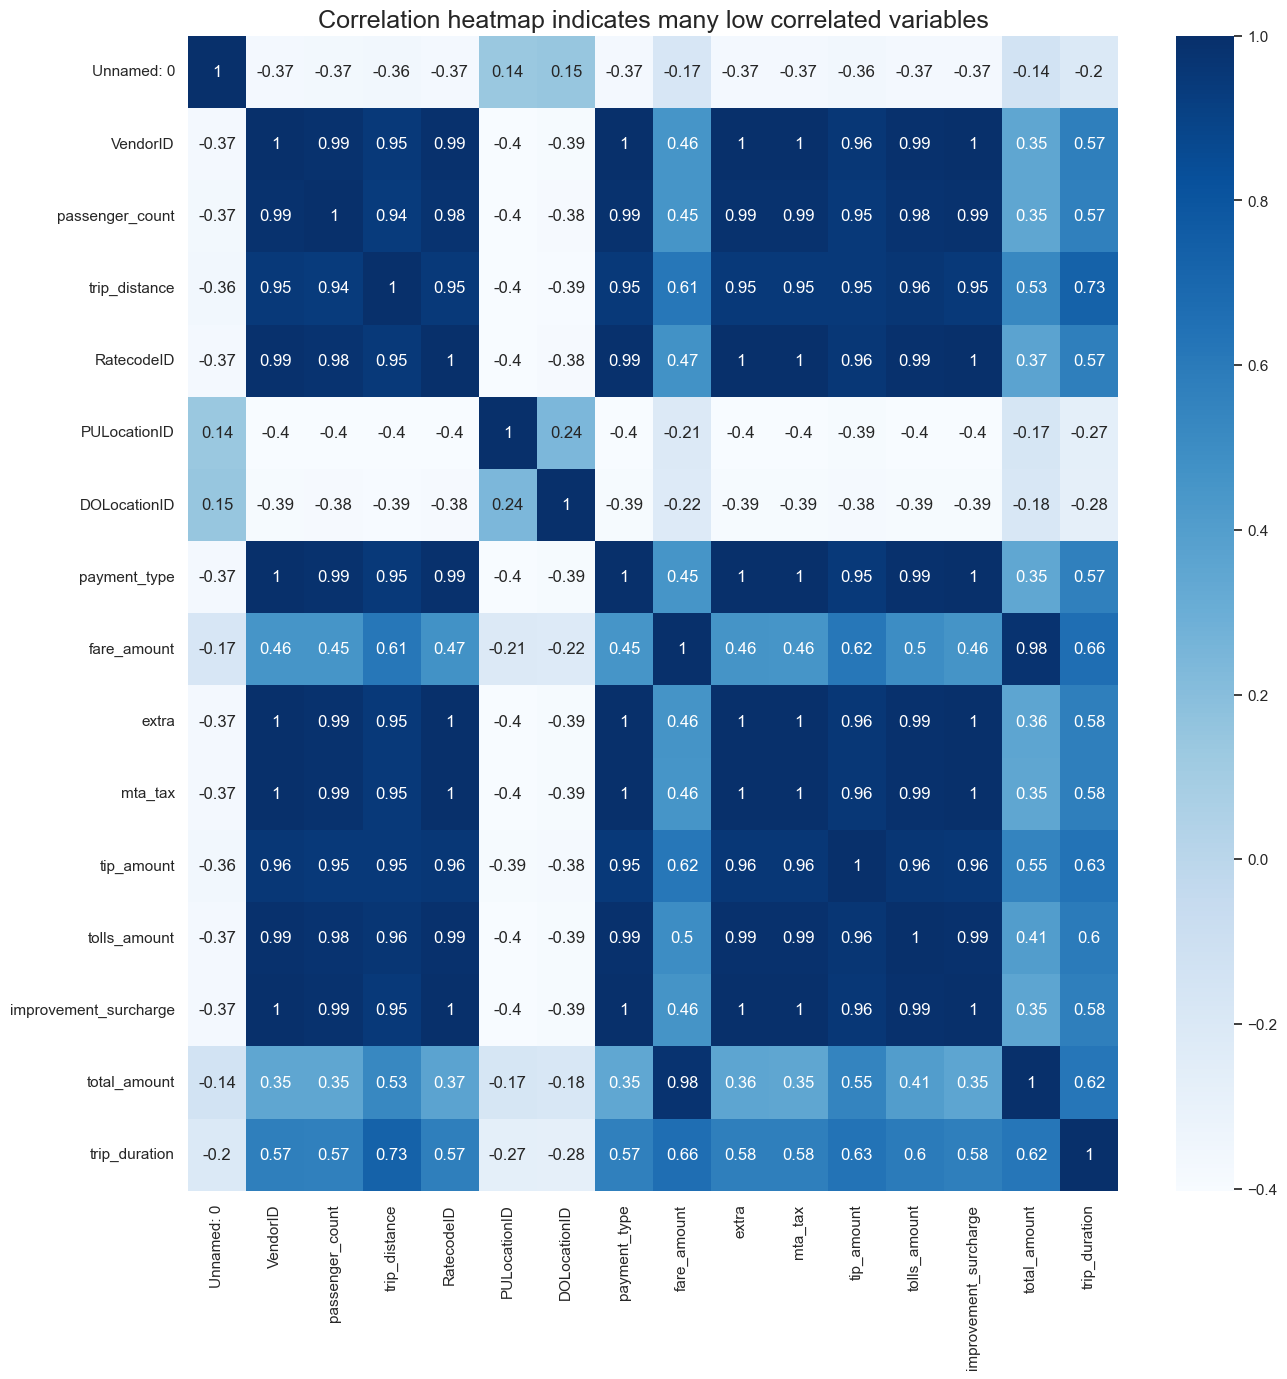

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")
plt.title("Correlation heatmap indicates many low correlated variables", fontsize=18)
plt.show

## Construc the model

### Select outcome variables and pre-process the data

In [15]:
# Set Y and X
Y = df[["trip_duration"]]
X = df.drop(columns="trip_duration")

# Pre-process
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head(10)

,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,4.37,1,2,0.5,0.5,0.00,0.0,0.3
5,2.30,1,1,0.5,0.5,2.06,0.0,0.3
6,36.00,36,36,36.0,36.0,36.00,36.0,36.0
7,2.98,1,1,1.0,0.5,1.78,0.0,0.3
8,1.20,1,2,0.0,0.5,0.00,0.0,0.3
9,1.60,1,1,0.0,0.5,2.75,0.0,0.3


In [16]:
# Standardize the X variables

X_scaled = StandardScaler().fit_transform(X)

### Build the model

In [17]:
# Create training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,  test_size=0.2, random_state=0)

In [18]:
# Build and fit the model to the training data

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
# Evaluate the model performance on the training data


r_sq = lr.score(X_train,Y_train)
print(f"Coefficient off determination: {r_sq}")
Y_pred = lr.predict(X_train)
print(f"R^2: {r2_score(Y_train,Y_pred)}")
print(f"Mae: {mean_absolute_error(Y_train,Y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, Y_pred))}")

Coefficient off determination: 0.6712137054597715
R^2: 0.6712137054597715
Mae: 3.919006542562228
RMSE: 5.298003079884207


In [20]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.6764864807825379
R^2: 0.6764864807825379
MAE: 3.906665290048614
RMSE: 5.270118142280882


## Analyze the model

Analyze and visualize the results

In [21]:
results = pd.DataFrame(data={"actual": Y_test["trip_duration"],
                             "predicted": Y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
5818,18.016667,14.265194,3.751473
18134,36.000000,36.000689,-0.000689
4655,5.883333,8.868908,-2.985574
7378,15.950000,16.782934,-0.832934
13914,11.900000,11.424318,0.475682


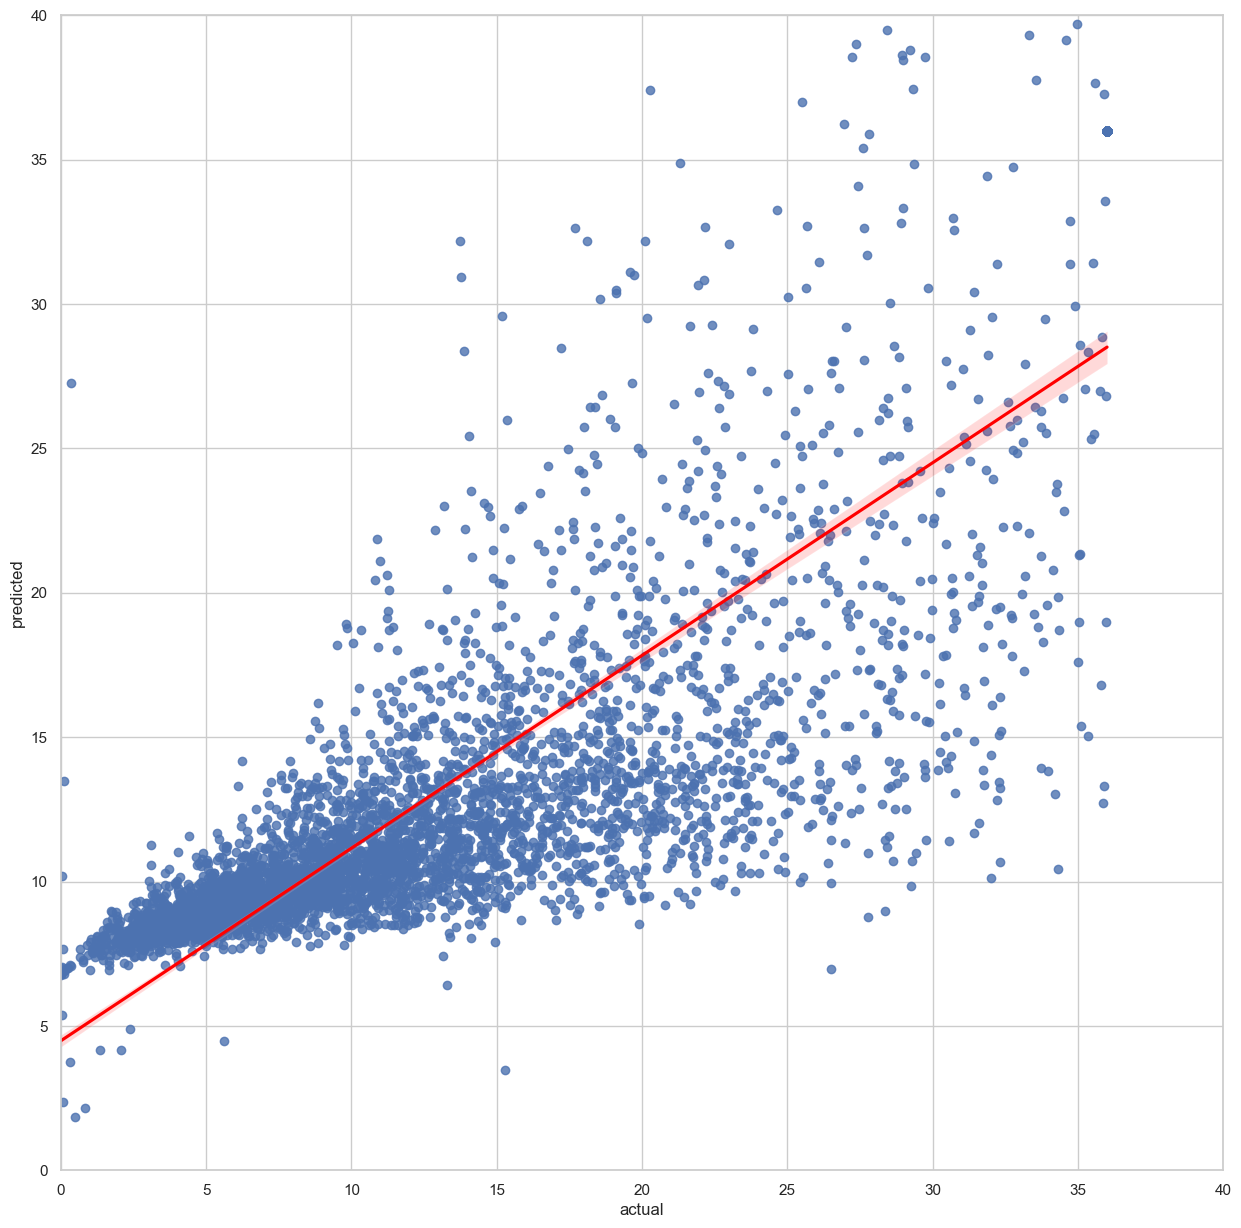

In [22]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",y="predicted",data=results, line_kws={"color": "red"})
plt.ylim(0,40)
plt.xlim(0,40)
plt.show()



### Analyze the residuals

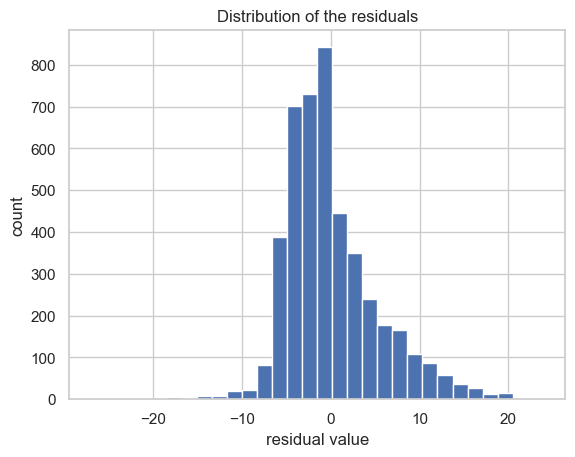

In [23]:
plt.hist(results["residual"], bins = 30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

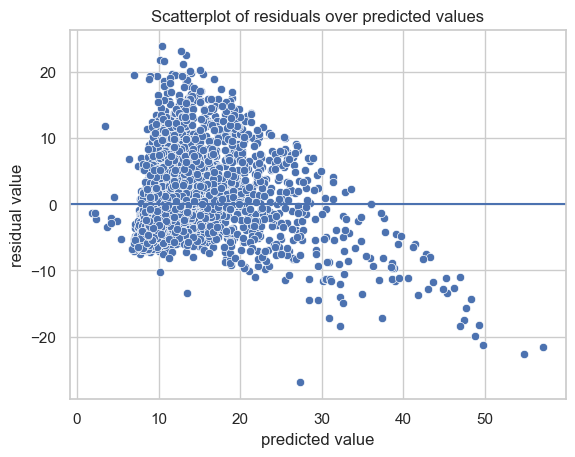

In [24]:
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()